In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Ignore Warnings

In [361]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Show all columns

In [362]:
pd.set_option("display.max_columns", None)

### Set plot style 

In [363]:
sns.set_style("whitegrid")

### Load dataset

In [364]:
df_credit_risk = pd.read_csv("german_credit_data.csv")

In [365]:
df_credit_risk.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


### Summary statistics for Age 

In [366]:
df_credit_risk['Age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [367]:
df_credit_risk['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [368]:
df_credit_risk.shape

(1000, 11)

### `Saving accounts` and `Checking account` are categorical with many missing values (`817` and `606` non-null, respectively)

In [369]:
df_credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [370]:
df_credit_risk.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [371]:
df_credit_risk['Job'].unique()

array([2, 1, 3, 0], dtype=int64)

### Check Duplicate rows

In [372]:
df_credit_risk.duplicated().sum()

0

### Handle missing values  
Drop rows with missing values in `Saving accounts` and `Checking account` instead of imputing, as these are key features for analysis.  


In [373]:
df_credit_risk.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [374]:
df_credit_risk = df_credit_risk.dropna().reset_index(drop=True)

In [375]:
df_credit_risk

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


### Drop unnecessary columns

In [376]:
df_credit_risk.drop(columns = 'Unnamed: 0', inplace = True)

### Exploratory data analysis (EDA)

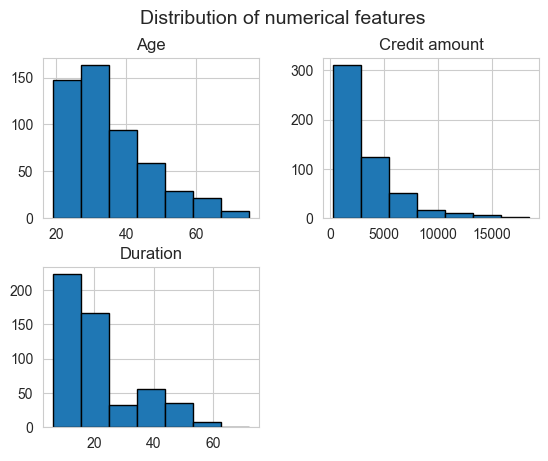

In [377]:
df_credit_risk[["Age", "Credit amount", "Duration"]].hist(bins = 7, edgecolor = "black")
plt.suptitle("Distribution of numerical features", fontsize = 14)
plt.show()

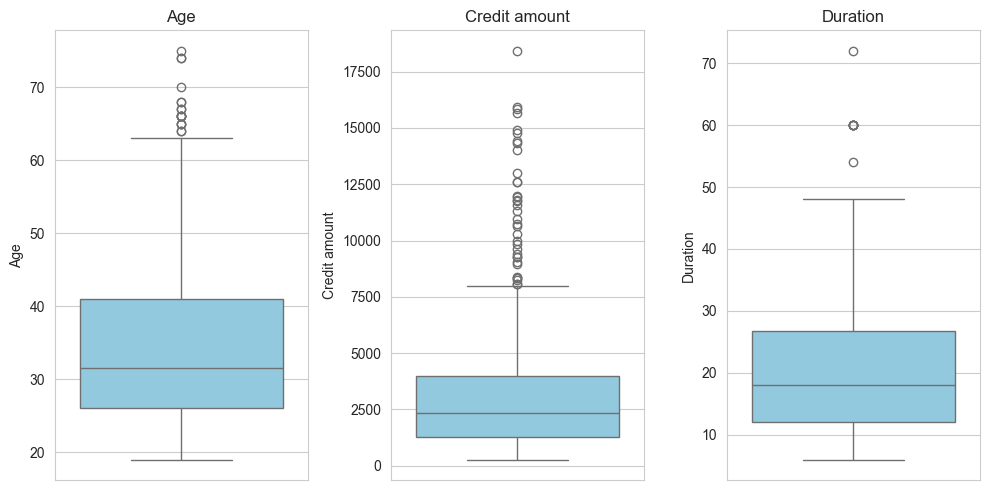

In [378]:
plt.figure(figsize = (10,5))

for index, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, index+1)
    sns.boxplot(y = df_credit_risk[col], color = 'skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

In [379]:
df_credit_risk.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [380]:
categorical_columns = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

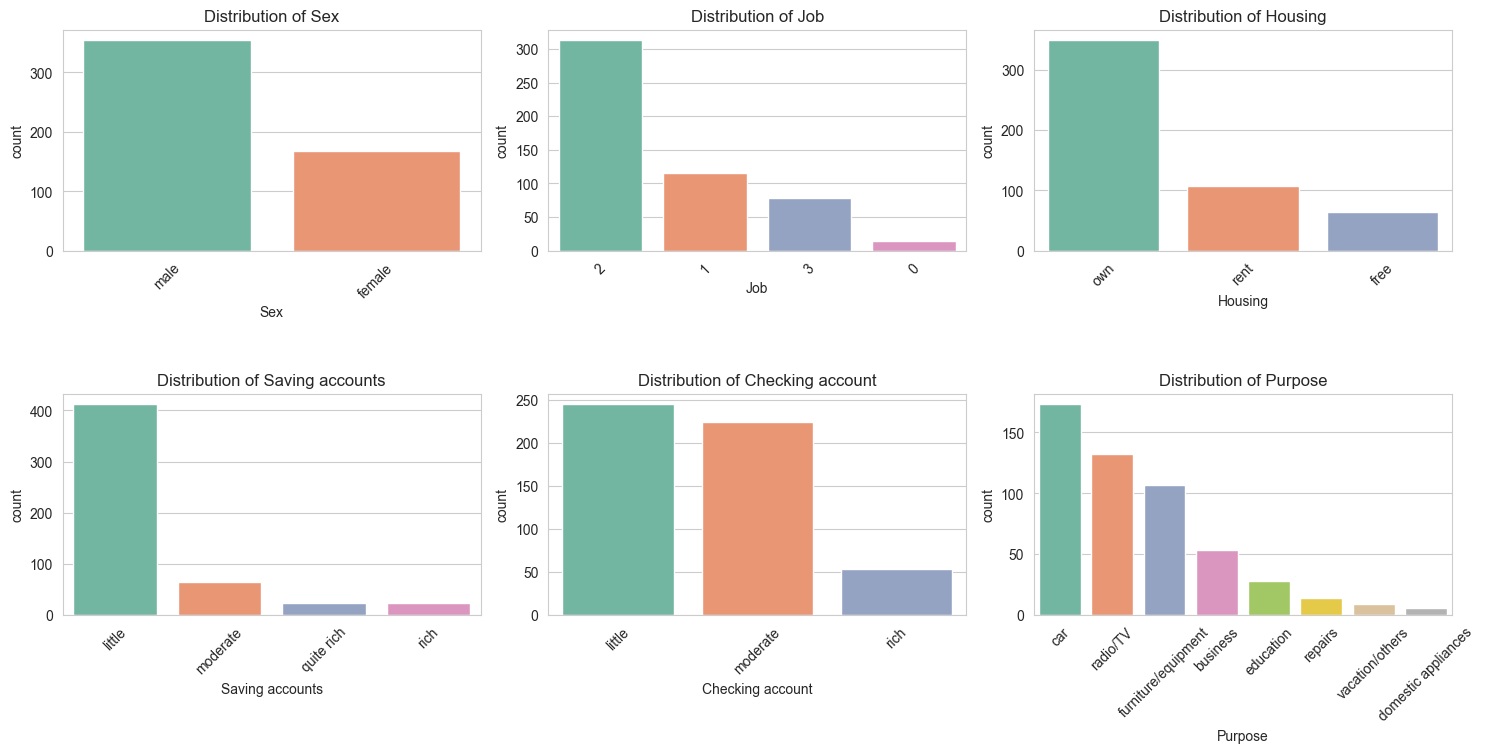

In [381]:
plt.figure(figsize = (15,10))

for index, col in enumerate(categorical_columns):
    plt.subplot(3, 3, index+1)
    sns.countplot(data = df_credit_risk, x = col, palette = "Set2", order = df_credit_risk[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [382]:
corr = df_credit_risk[["Age", "Job", "Credit amount", "Duration"]].corr()

### High Correlation between "Credit amount" and "Duration"

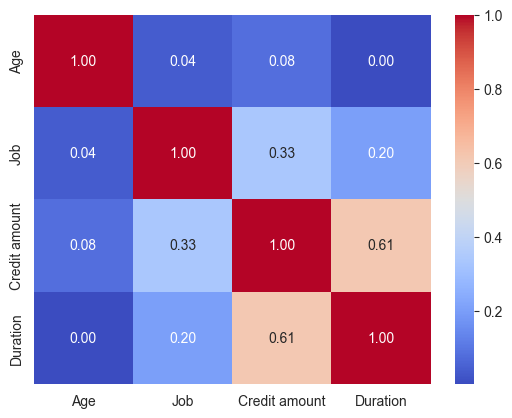

In [383]:
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.show()

In [384]:
df_credit_risk.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

### Men are asking for more credit amount

In [385]:
df_credit_risk.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [386]:
pd.pivot_table(df_credit_risk, values = "Credit amount", index = "Housing", columns = "Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


### Most of the credit is centered aroung young age with low credit amount <br> As the credit amount is increasing, larger dots implying more duration

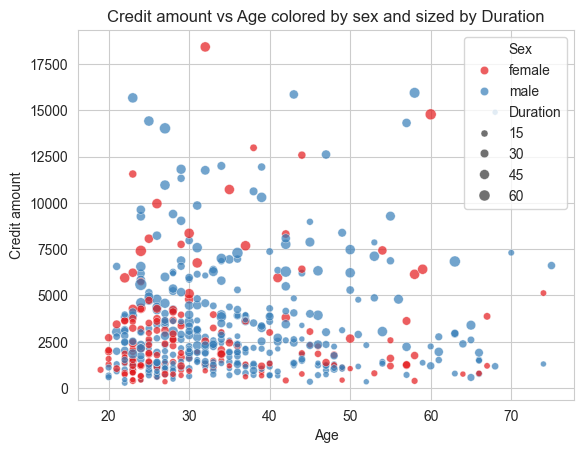

In [387]:
sns.scatterplot(data = df_credit_risk, x = "Age", y = "Credit amount", hue = "Sex", size = "Duration", alpha = 0.7, palette = "Set1")
plt.title("Credit amount vs Age colored by sex and sized by Duration")
plt.show()

### Credit account is not really related with saving account

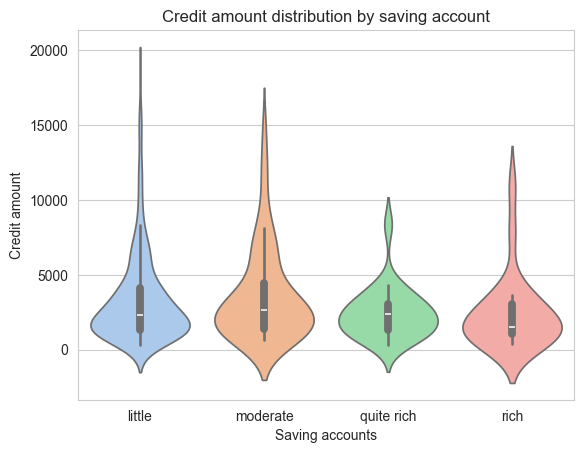

In [388]:
sns.violinplot(data = df_credit_risk, x = 'Saving accounts', y = "Credit amount", palette = "pastel")
plt.title("Credit amount distribution by saving account")
plt.show()

In [389]:
df_credit_risk["Risk"].value_counts(normalize = True)*100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

### "Credit amount" and "Duration" affect "Risk" highly

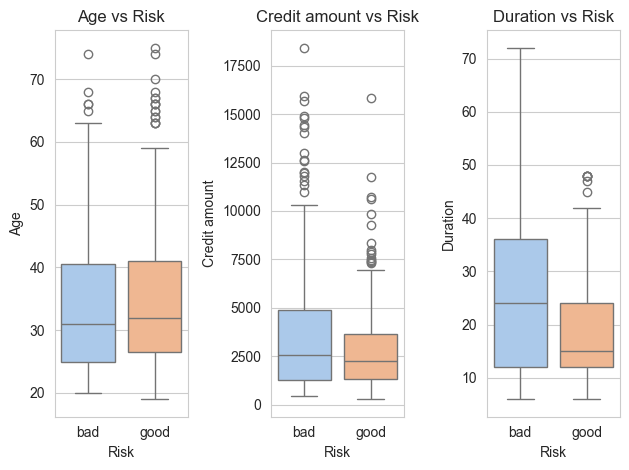

In [390]:
for index, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, index+1)
    sns.boxplot(data = df_credit_risk, x = "Risk", y = col, palette = "pastel")
    plt.title(f"{col} vs Risk")

plt.tight_layout()
plt.show()

### Lower the "Duration", Lower the "Risk" <br> Higher the "Credit amount", Higher the "Risk"

In [391]:
df_credit_risk.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


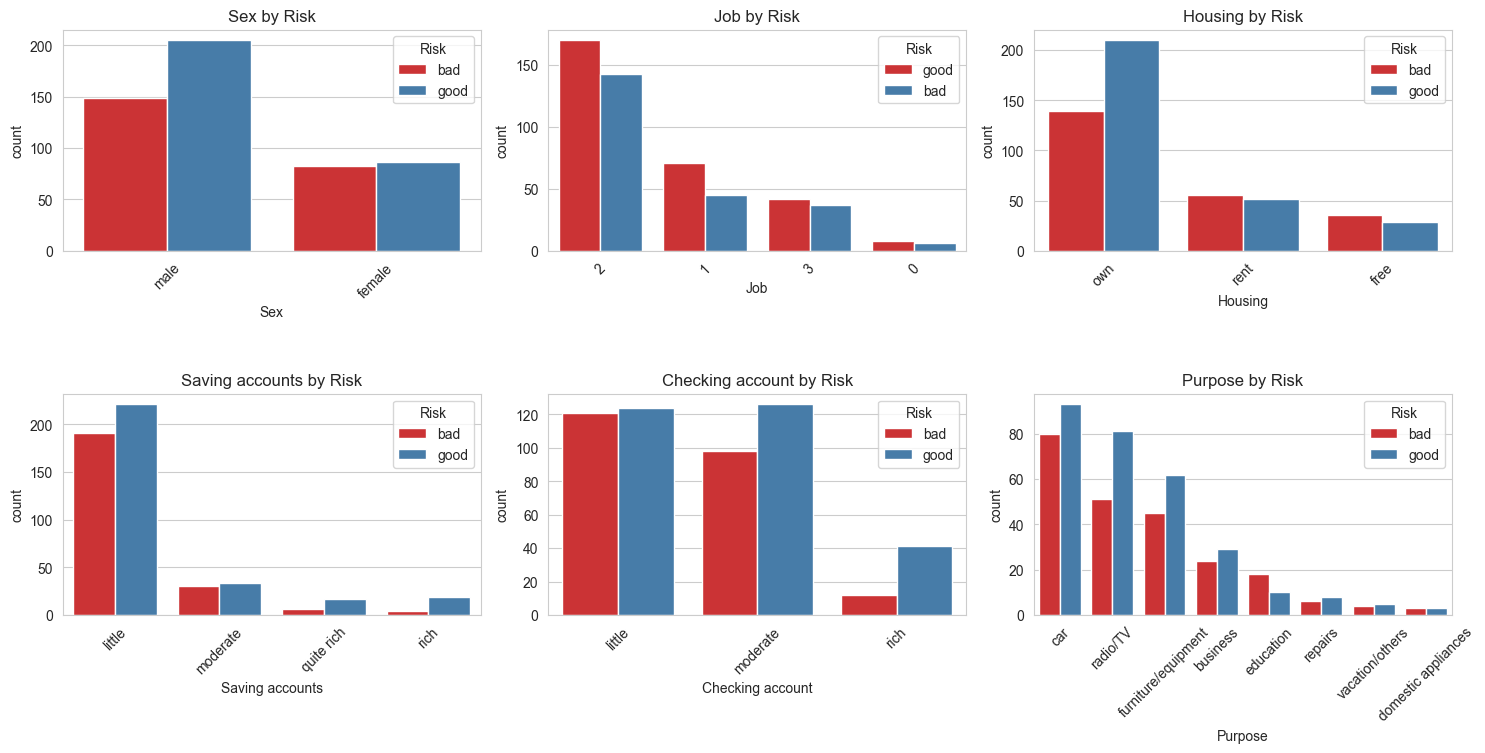

In [392]:
plt.figure(figsize = (15,10))

for index, col in enumerate(categorical_columns):
    plt.subplot(3, 3, index+1)
    sns.countplot(data = df_credit_risk, x = col, hue = "Risk", palette = "Set1", order = df_credit_risk[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()


### Feature Engineering

In [393]:
df_credit_risk.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [394]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']
target = 'Risk'

df_credit_risk_model = df_credit_risk[features + [target]].copy()
df_credit_risk_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


1. Encoding Categorical columns

In [395]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [396]:
categorical_cols = df_credit_risk_model.select_dtypes(include = 'object').columns.drop("Risk")

In [397]:
label_encoders = {}

In [398]:
for col in categorical_cols:
    encoder = LabelEncoder()
    df_credit_risk_model[col] = encoder.fit_transform(df_credit_risk_model[col])
    label_encoders[col] = encoder
    joblib.dump(encoder, f"{col}_encoder.pkl")

In [399]:
target_encoder = LabelEncoder()
df_credit_risk_model[target] = target_encoder.fit_transform(df_credit_risk_model[target])

In [400]:
df_credit_risk_model[target]

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int32

In [401]:
# 1: Good(Lower Risk), 2: Bad(Higher Risk)
df_credit_risk_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [402]:
joblib.dump(target_encoder, "target_encoder.pkl")

['target_encoder.pkl']

In [403]:
df_credit_risk_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


2. For Tree based model, scaling is not required because Tree-based models (Decision Trees, Random Forests, XGBoost) split data using thresholds, not distances, so feature scale doesn’t affect the splits

3. Splitting the data

In [404]:
from sklearn.model_selection import train_test_split

X = df_credit_risk_model.drop(target, axis = 1)
y = df_credit_risk_model[target]

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

In [406]:
X_train.shape

(417, 8)

In [407]:
X_test.shape

(105, 8)

### Building and Training the model

In [408]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

1. Passing the model based on initialization
2. Initialized the grid search for hyperparameter tuning
3. Train the model
4. Select the best estimator
5. Get the predictions on X_test
6. Compare it with the y_test

In [409]:
cat_indices = [X_train.columns.get_loc(col) for col in categorical_cols]

def train_model(model, param_grid, X_train, y_train, X_test, y_test, cat_features=None):
    grid = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

    if isinstance(model, CatBoostClassifier):
        grid.fit(X_train, y_train, **{'cat_features': cat_indices})
    else:
        grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return best_model, accuracy, grid.best_params_


In [410]:
decision_tree_param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

random_forest_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

extra_tree_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1],
    "colsample_bytree": [0.7, 1]
}

catboost_param_grid = {
    "iterations": [200],
    "depth": [4, 6],
    "learning_rate": [0.05, 0.1]
}

In [411]:
def train_best_model(models_with_params, X_train, y_train, X_test, y_test, cat_features=None):
    best_accuracy = 0
    best_model = None
    best_params = None
    best_model_name = None

    for name, (model, param_grid) in models_with_params.items():
        if name == "CatBoost":
            trained_model, accuracy, params = train_model(model, param_grid, X_train, y_train, X_test, y_test, cat_features=cat_features)
        else:
            trained_model, accuracy, params = train_model(model, param_grid, X_train, y_train, X_test, y_test)
        
        print(f"{name} Accuracy: {accuracy:.4f}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = trained_model
            best_params = params
            best_model_name = name

    print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")
    return best_model, best_accuracy, best_params


In [412]:
models = {
    "Decision Tree": (DecisionTreeClassifier(random_state=1, class_weight="balanced"), decision_tree_param_grid),
    "Random Forest": (RandomForestClassifier(random_state=1, class_weight="balanced", n_jobs=-1), random_forest_grid),
    "Extra Trees": (ExtraTreesClassifier(random_state=1, class_weight="balanced", n_jobs=-1), extra_tree_grid),
    "XGBoost": (XGBClassifier(random_state=1, 
                              scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(), 
                              use_label_encoder=False, 
                              eval_metric="logloss"), xgb_param_grid),
    "CatBoost": (CatBoostClassifier(random_seed=1, iterations=100, depth=6, learning_rate=0.1, verbose=100), catboost_param_grid)
}

In [413]:
best_model, best_accuracy, best_params = train_best_model(
    models, X_train, y_train, X_test, y_test, cat_features=categorical_columns
)

Decision Tree Accuracy: 0.5810
Random Forest Accuracy: 0.6190
Extra Trees Accuracy: 0.6476
XGBoost Accuracy: 0.6762
0:	learn: 0.6844624	total: 26.4ms	remaining: 5.26s
100:	learn: 0.5015739	total: 3.32s	remaining: 3.26s
199:	learn: 0.4001451	total: 6.41s	remaining: 0us
0:	learn: 0.6870129	total: 24.7ms	remaining: 4.91s
100:	learn: 0.5131171	total: 3.11s	remaining: 3.05s
199:	learn: 0.4173650	total: 6.14s	remaining: 0us
0:	learn: 0.6880807	total: 24.7ms	remaining: 4.92s
100:	learn: 0.5201460	total: 3.21s	remaining: 3.15s
199:	learn: 0.4192103	total: 6.31s	remaining: 0us
0:	learn: 0.6852679	total: 23.9ms	remaining: 4.75s
100:	learn: 0.4889164	total: 3.11s	remaining: 3.04s
199:	learn: 0.3800479	total: 6.43s	remaining: 0us
0:	learn: 0.6871581	total: 25.7ms	remaining: 5.12s
100:	learn: 0.5066303	total: 3.26s	remaining: 3.19s
199:	learn: 0.4041453	total: 6.38s	remaining: 0us
0:	learn: 0.6762888	total: 22.9ms	remaining: 4.55s
100:	learn: 0.3922153	total: 3.31s	remaining: 3.24s
199:	learn: 0.27

### Model Evaluation

1. Confusion Matrix

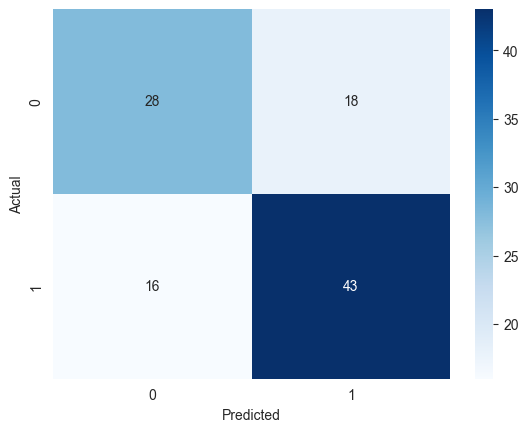

In [414]:
from sklearn.metrics import confusion_matrix

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [415]:
print(cm)

[[28 18]
 [16 43]]


2. ROC-AUC with XGBoost

ROC-AUC: 0.706337509211496


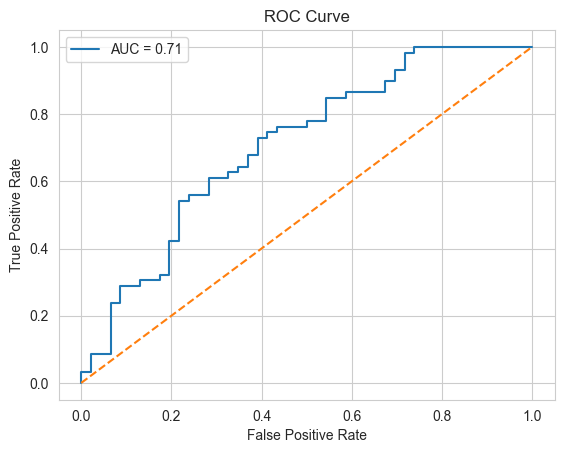

In [416]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get predicted probabilities for the positive class
y_prob = best_model.predict_proba(X_test)[:, 1]

# ROC-AUC score
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

3. Cross Validation: CV=5

In [417]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="accuracy")
print("CV Accuracy scores:", scores)
print("Mean CV Accuracy:", scores.mean())


CV Accuracy scores: [0.6547619  0.66666667 0.78313253 0.65060241 0.62650602]
Mean CV Accuracy: 0.6763339070567985


### Export the model

In [419]:
joblib.dump(best_model, "credit_model.pkl")

['credit_model.pkl']